# INTRO

The top 3 most populated countries are the most richest, improving the population is one of the best investment that a country can make. So I created a ML model that can predict if the next years the human population is going to grow, and how much it is goint to be.

# LIBRARIES AND DATASET

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("world_population_data.csv")
df.head()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


# ETL

### Dropping unnecessary columns to our analysis

In [3]:
df.drop(["growth rate", "world percentage","rank"], axis = 1, inplace = True)
df.head()

,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²)
0,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481
1,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151
2,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37
3,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148
4,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312


# EDA

### Bar plot of most biggest continents

continent
Asia             32138143.90
Africa           30317963.00
North America    24244178.00
Europe           23010411.26
South America    17833382.00
Oceania           8515218.00
Name: area (km²), dtype: float64


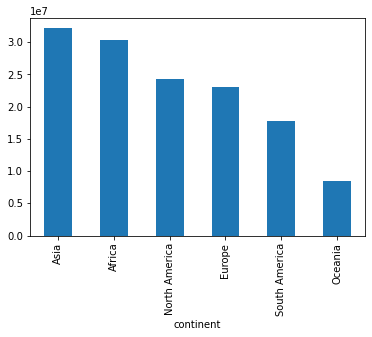

In [5]:
print(df.groupby("continent")["area (km²)"].sum().sort_values(ascending = False))
df.groupby("continent")["area (km²)"].sum().sort_values(ascending = False).plot(kind="bar")
plt.show()

### Barplot of the top 10 countries with most population

<AxesSubplot:xlabel='country', ylabel='2023 population'>

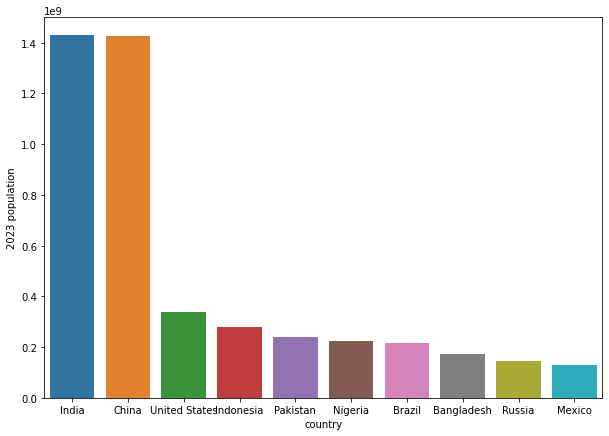

In [31]:
plt.figure(figsize=(10,7))
df_top10 = df.where(df["2023 population"] > 128455566 )
sns.barplot("country", "2023 population", data = df_top10)

### Heatmap of correlation with the population of all years

In [7]:
df.columns

Index(['cca3', 'country', 'continent', '2023 population', '2022 population',
       '2020 population', '2015 population', '2010 population',
       '2000 population', '1990 population', '1980 population',
       '1970 population', 'area (km²)', 'density (km²)'],
      dtype='object')

<AxesSubplot:>

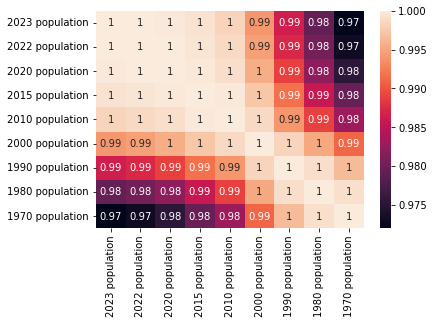

In [8]:
pop_list = df[['2023 population', '2022 population',
       '2020 population', '2015 population', '2010 population',
       '2000 population', '1990 population', '1980 population',
       '1970 population']]

corr_pop_list = pop_list.corr()

sns.heatmap(corr_pop_list, annot = True)

### Heatmap correlation between how bigger is a country and how density it is

<AxesSubplot:>

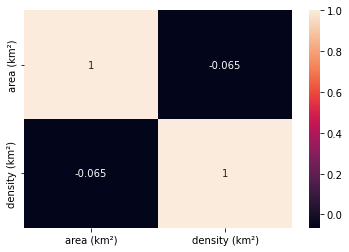

In [9]:
feat_list = df[['area (km²)', 'density (km²)']]

corr_feat_list = feat_list.corr()

sns.heatmap(corr_feat_list, annot = True)

### Creating a dataset summarizing the population per year

In [11]:
df1 = pd.read_csv("world_population_datapivot.csv", sep = ";")
df1

,Year,Total Population
0,2023,8043615390
1,2022,7973413043
2,2020,7839250603
3,2015,7424809761
4,2010,6983785000
5,2000,6147055703
6,1990,5314191665
7,1980,4442400374
8,1970,3694136661


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Year              9 non-null      int64
 1   Total Population  9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes


# MACHINE LEARNING

### Creating the X and y dataset and training and testing dataser

In [13]:
from sklearn.model_selection import train_test_split

X = df1[['Year']]
y = df1['Total Population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(X_train)
print(y_train)

   Year
4  2010
8  1970
3  2015
5  2000
6  1990
1  2022
4    6983785000
8    3694136661
3    7424809761
5    6147055703
6    5314191665
1    7973413043
Name: Total Population, dtype: int64


### Training the model

In [14]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

### Making predictions

In [15]:
predictions = lm.predict(X_test)

### Scatter the correlation between real values and predicted values

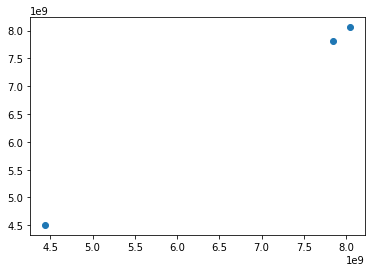

In [16]:
plt.scatter(y_test, predictions)

### Histogram of the residuals (errors)

<AxesSubplot:xlabel='Total Population', ylabel='Density'>

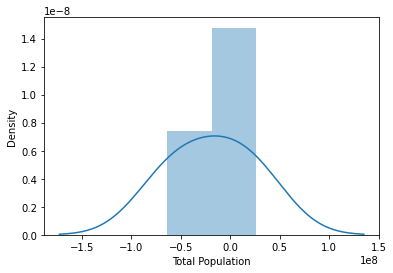

In [17]:
sns.distplot((y_test-predictions))

### Performing the evaluation of the model

In [18]:
from sklearn import metrics

print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  35907931.494374596
MSE:  1699236891164573.8
RMSE:  41221801.16351751


# SIMULATION

In [19]:
year = [[2024]]
pred_pop = lm.predict(year)

print(f"The prediction for the {year[0][0]} population is: ", int(pred_pop))

The prediction for the 2024 population is:  8143743837


In [20]:
year = [[2025]]
pred_pop = lm.predict(year)

print(f"The prediction for the {year[0][0]} population is: ", int(pred_pop))

The prediction for the 2025 population is:  8226408590


In [21]:
year = [[2030]]
pred_pop = lm.predict(year)

print(f"The prediction for the {year[0][0]} population is: ", int(pred_pop))

The prediction for the 2030 population is:  8639732356


In [22]:
year = [[2050]]
pred_pop = lm.predict(year)

print(f"The prediction for the {year[0][0]} population is: ", int(pred_pop))

The prediction for the 2050 population is:  10293027420


In [23]:
year = [[2100]]
pred_pop = lm.predict(year)

print(f"The prediction for the {year[0][0]} population is: ", int(pred_pop))

The prediction for the 2100 population is:  14426265081
